# Cleansing Logistics Data

### Objective:
Cleanse logistics data using Python's pandas and matplotlib, and season for data exploration. The process involves removing missing values, checking inconsistencies, accuracy, and handling outliers. The final step is to create a cleaned data asset.

### Steps:

1. **Remove Missing Values:**
   - Use pandas to identify and drop rows or columns with missing values.

2. **Check Inconsistencies:**
   - Validate data consistency and identify any discrepancies.

3. **Check Accuracy:**
   - Examine data accuracy, ensuring values are within expected ranges.

4. **Handle Outliers:**
   - Use pandas and matplotlib to detect and manage outliers.

5. **Data Exploration:**
   - Utilize seaborn for data exploration, visualizing patterns and trends.

6. **Clean and Validate Data:**
   - Implement cleaning procedures and validate the dataset after each step.

7. **Create Cleaned Data Asset:**
   - Save the cleansed data to a new file for future use.

### Tools Used:
- **pandas:** Data manipulation and cleaning.
- **matplotlib:** Visualization of data and outliers.
- **seaborn:** Data exploration through visualizations.

### Final Output:
A cleaned and validated logistics dataset ready for analysis and modeling.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import warnings

# Suppress all warnings
warnings.filterwarnings('ignore')

In [2]:
logistics_df = pd.read_excel('../../assets/data/raw/logistics.xlsx')
logistics_df

,reference_id,added_time_stamp,deleted_time_stamp,time_span,destination_city,destination_state,origin_city,origin_state,comment,Miles,shipper,truck_type,min_rate,max_rate,average rate per mile
0,10711141,2023-11-28 12:07:52,2023-11-28 12:10:27,0:02:35,Ft Worth,TX,ABEILENE,TX,NaN,0,NaN,F,600,600,NaN
1,10711143,2023-11-28 11:50:31,2023-11-28 11:53:49,0:03:18,Ft Worth,TX,ABEILENE,TX,NaN,0,NaN,F,600,600,NaN
2,10711145,2023-11-28 12:10:26,2023-11-28 12:27:53,0:17:27,Ft Worth,TX,ABEILENE,TX,NaN,0,NaN,F,600,600,NaN
3,10711151,2023-11-28 11:53:48,2023-11-28 12:02:09,0:08:21,Ft Worth,TX,ABEILENE,TX,NaN,0,NaN,F,600,600,NaN
4,10711155,2023-11-29 10:40:12,2023-11-29 11:37:34,0:57:22,ORLA,TX,ABEILENE,TX,NaN,0,NaN,F,900,900,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11416,10724771,2023-12-12 08:09:06,2023-12-12 08:13:45,0:04:39,SARASOTA,FL,ZWOLLE,LA,NaN,0,NaN,F,2150,2150,NaN
11417,10726991,2023-12-13 12:48:07,2023-12-14 09:37:28,20:49:21,MARYLAND HE,MO,ZWOLLE,LA,NaN,0,NaN,F,1100,1250,NaN
11418,30316024,2023-12-18 16:31:11,2023-12-18 17:37:42,1:06:31,LA VALLE,WI,ZWOLLE,LA,MUST TARP,1055,VFP,F,1900,2000,1.848341
11419,30320680,2023-12-27 09:49:55,2023-12-27 12:04:35,2:14:40,COLFAX,WI,ZWOLLE,LA,MUST TARP,1151,VFP,F,2100,2100,1.824500


Correcting column nomenclature to snake case for consistency and ease of use:

```markdown
Original Columns:
- Miles
- average rate per mile
- refrence_id

Corrected Columns:
- miles
- average_rate_per_mile
- load_id
```

In the corrected version, column names are formatted in snake case, providing a standardized and user-friendly naming convention.

In [3]:
logistics_df.rename(
    columns={'Miles': 'miles', 'average rate per mile': 'average_rate_per_mile', 'reference_id': 'load_id'}, inplace=True)
logistics_df.columns

Index(['load_id', 'added_time_stamp', 'deleted_time_stamp', 'time_span',
       'destination_city', 'destination_state', 'origin_city', 'origin_state',
       'comment', 'miles', 'shipper', 'truck_type', 'min_rate', 'max_rate',
       'average_rate_per_mile'],
      dtype='object')

## Checking Missing Values with Visualization

To assess missing values in the logistic data, a visual representation using matplotlib can provide insights. Utilizing a bar plot allows for a quick overview of missing values in each column.

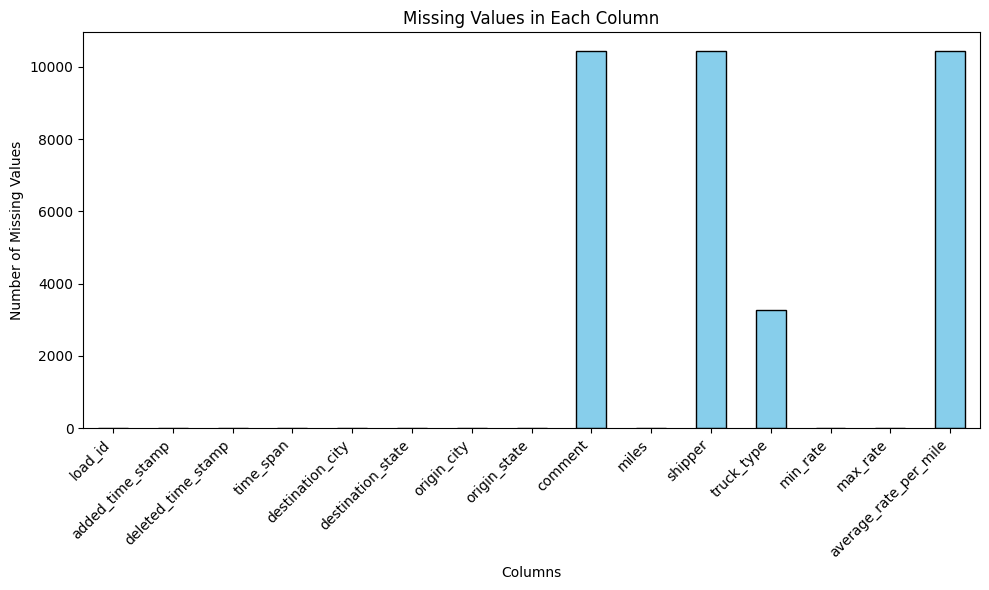

In [4]:
missing_values = logistics_df.isnull().sum()

plt.figure(figsize=(10, 6))
missing_values.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Missing Values in Each Column')
plt.xlabel('Columns')
plt.ylabel('Number of Missing Values')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Handling Missing Values in Logistic Data

Upon inspecting the logistic data, several columns were found to have missing values:

1. **Categorical Columns with Missing Values:**
   - `shipper`, `comment`, `truck_type`

2. **Numerical Column with Missing Values:**
   - `average_rate_per_mile`

### Handling Strategy:

#### Categorical Columns:
   - For `shipper`, `comment`, and `truck_type`, replace missing values with a constant.

#### Numerical Column:
   - For `average_rate_per_mile`, replace missing values with the mean or employ other suitable methods.

In [5]:
# All categorical columns
logistics_df.comment.fillna('NO COMMENT',inplace=True)
logistics_df.shipper.fillna('NO SHIPPER',inplace=True)
logistics_df.truck_type.fillna('NO TRUCK TYPE',inplace=True)

### Handling Missing Values in `average_rate_per_mile` Column

The `average_rate_per_mile` column has only 990 non-null values out of 11,421, making it challenging to drop rows without losing significant data. In such cases, a practical approach is to fill the missing values with zero.
Adjust the filling strategy based on the context and domain knowledge. Filling with zero is a pragmatic choice when meaningful replacement values are unavailable, and dropping rows is not feasible due to the extent of missing data.

In [6]:
logistics_df.average_rate_per_mile.fillna(0, inplace=True)

## Data Integrity and Consistency Check

Ensuring data accuracy is crucial for reliable analytics. Several aspects of integrity and consistency are vital to examine:

1. **Data Types:**
   - Confirm that each column has the correct data type to avoid misinterpretations.

2. **Range Checks:**
   - Perform range checks on numerical values to identify outliers or unexpected data.

3. **Categorical Values:**
   - Validate that categorical columns contain only predefined values.

4. **Unique Identifiers:**
   - Check for uniqueness in identifiers to prevent duplicate records.

Adjust column names accordingly and use additional checks based on specific data characteristics. Performing these checks enhances confidence in data accuracy for subsequent analytics.

In [7]:
{column: str(logistics_df[column].dtype) for column in logistics_df.columns} # Checking data types of columns

{'load_id': 'int64',
 'added_time_stamp': 'datetime64[ns]',
 'deleted_time_stamp': 'datetime64[ns]',
 'time_span': 'object',
 'destination_city': 'object',
 'destination_state': 'object',
 'origin_city': 'object',
 'origin_state': 'object',
 'comment': 'object',
 'miles': 'int64',
 'shipper': 'object',
 'truck_type': 'object',
 'min_rate': 'int64',
 'max_rate': 'int64',
 'average_rate_per_mile': 'float64'}

### Converting Time Span to Hours

In the data, the `time_span` column is currently of type 'object,' and to enhance usability, it will be converted to a more suitable time unit, such as hours.

In [8]:
logistics_df.time_span = round(pd.to_timedelta(logistics_df.time_span).dt.total_seconds() / 3600,2)
logistics_df.rename(columns={'time_span':'time_span_in_hours'},inplace=True)

### Data Integrity Checks

1. **Unique Load Id:**
   - Ensure each Reference Id is unique. Resolve conflicts by deleting conflicting records.

2. **Added Time and Deleted Time:**
   - Verify that Added Time is earlier than Deleted Time for each record.

3. **Distinct Origin and Destination:**
   - Confirm that Origin and Destination City are not identical.

4. **Min Rate Constraint:**
   - Check that Min Rate is not greater than Rate.

5. **Time Span Consistency:**
   - Validate that the difference between Added and Deleted Time equals the Time Span.

6. **Non-Negative Values:**
   - Ensure miles, min_rate, max_rate, and average_rate_per_mile are non-negative.

7. **Duplicate Records:**
   - Detect and resolve duplicate records based on Load Id to maintain data uniqueness and integrity.

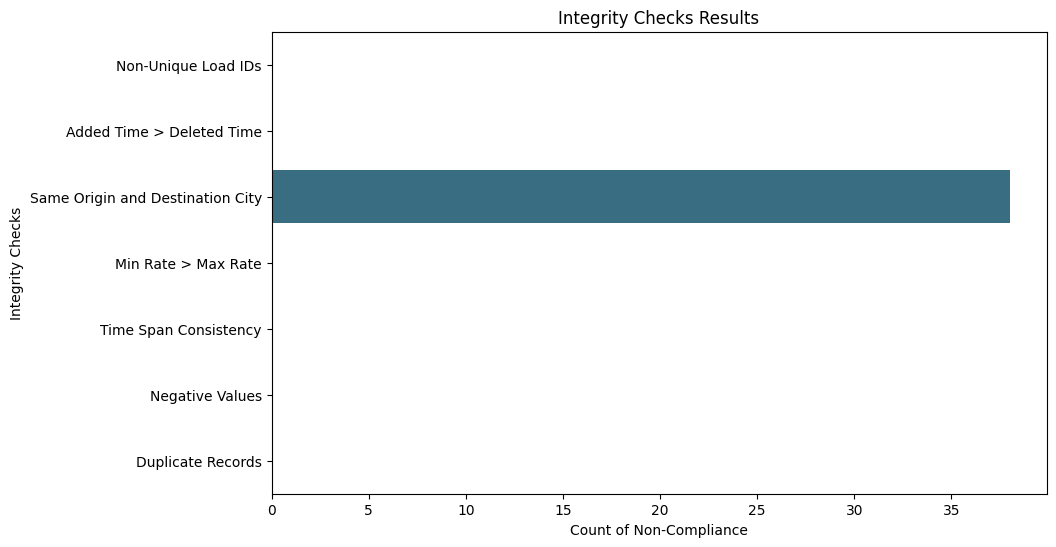

In [9]:
# create checks here
non_unique_load_ids = logistics_df[ logistics_df.load_id.duplicated()].shape[0]
add_greater_than_delete = logistics_df[logistics_df.added_time_stamp > logistics_df.deleted_time_stamp].shape[0]
city_with_same_origin_desitination = logistics_df[logistics_df.origin_city == logistics_df.destination_city].shape[0]
min_greater_than_max = logistics_df[logistics_df.min_rate > logistics_df.max_rate].shape[0]
span_time_check = logistics_df[logistics_df.time_span_in_hours !=  round(((logistics_df.deleted_time_stamp - logistics_df.added_time_stamp).dt.total_seconds() / 3600),2)].shape[0]
negitive_values = (logistics_df[[column for column in ['min_rate','max_rate','miles','average_rate_per_mile']]] < 0).sum()
duplicate_records = (logistics_df.duplicated() == True).sum()

# plotting checks on graph
checks = ['Non-Unique Load IDs', 'Added Time > Deleted Time', 'Same Origin and Destination City',
          'Min Rate > Max Rate', 'Time Span Consistency', 'Negative Values','Duplicate Records']

counts = [non_unique_load_ids, add_greater_than_delete, city_with_same_origin_desitination,
          min_greater_than_max, span_time_check, negitive_values.sum(),duplicate_records]

# 
plt.figure(figsize=(10, 6))
sb.barplot(x=counts, y=checks, palette='viridis')
plt.title('Integrity Checks Results')
plt.xlabel('Count of Non-Compliance')
plt.ylabel('Integrity Checks')
plt.show()

### Data Integrity Check Visualization

The integrity check results are visualized, highlighting that the "Same Origin and Destination City" check reveals 38 non-compliant values. Given the rarity of identical origin and destination in logistics, it is reasonable to remove these rows. With over 11,000 rows, removing 38 records is unlikely to impact the overall dataset significantly.

In [10]:
logistics_df = logistics_df[logistics_df.origin_city != logistics_df.destination_city]
logistics_df.shape[0]

11383

## Outlier Detection in Numerical Columns

Utilize statistical approaches like Interquartile Range (IQR) to identify outliers in the following numerical columns:

1. **Miles:**
2. **Average Rate Per Mile:**

In [11]:
def get_outliers(df: pd.DataFrame, column: str) -> pd.DataFrame:
    q1 = df[column].quantile(.25)
    q3 = df[column].quantile(.75)
    iqr = q3 - q1

    lower_bound = (q1 - 1.5) * iqr
    upper_bound = (q3 + 1.5) * iqr

    return df[(df[column] <
                         lower_bound) | (df[column] > upper_bound)]

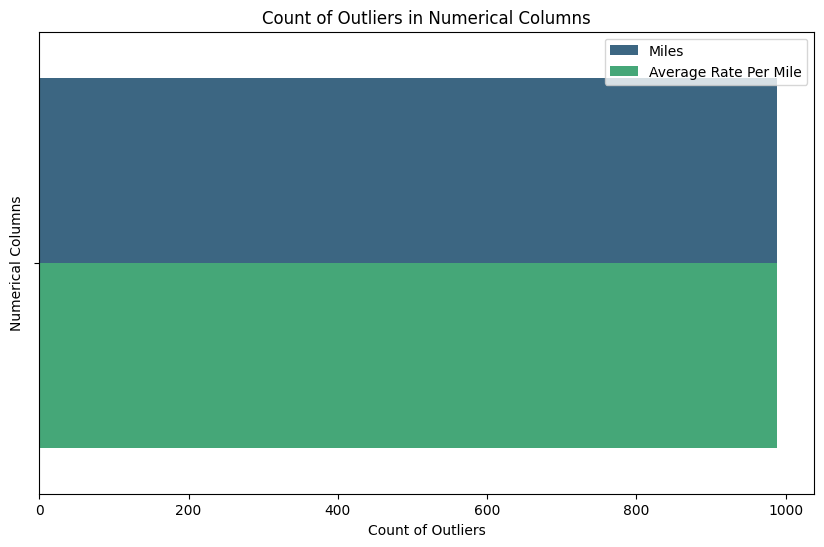

In [12]:
miles_ot = get_outliers(df=logistics_df, column='miles').shape[0]
average_rate_per_mile_ot = get_outliers(
    df=logistics_df, column='average_rate_per_mile').shape[0]

columns = ['Miles', 'Average Rate Per Mile']
outlier_counts = [miles_ot, average_rate_per_mile_ot]

plt.figure(figsize=(10, 6));
sb.barplot(x=outlier_counts, hue=columns, palette='viridis',legend=True)
plt.title('Count of Outliers in Numerical Columns')
plt.xlabel('Count of Outliers')
plt.ylabel('Numerical Columns')
plt.show()

### Outlier Analysis and Data Handling

From the observed graph, it is evident that columns like 'miles' and 'average_rate_per_mile' share the same number of outliers (989). This suggests a potential relationship between these columns. Given the substantial number of outliers, a decision to retain the data for simple analytics is reasonable, deferring a more nuanced approach for predictive analytics.

**Current Action:**
- Retain the data with outliers for simple analytics.

**Future Consideration:**
- For predictive analytics, a more in-depth analysis and handling of outliers will be explored.

### Data Partitioning and Date Normalization

The processed data will be organized into folders based on the year (e.g., 2023), and each year folder will contain subfolders for each quarter (Q1, Q2, Q3, Q4). Additionally, new columns for month, day, hour, minute, and second will be added using the 'added_time_stamp' column for date normalization.

In [13]:
logistics_df['added_month'] = logistics_df['added_time_stamp'].dt.month.copy()
logistics_df['added_day'] = logistics_df['added_time_stamp'].dt.day.copy()
logistics_df['added_hour'] = logistics_df['added_time_stamp'].dt.hour.copy()
logistics_df['added_minute'] = logistics_df['added_time_stamp'].dt.minute.copy()
logistics_df['added_second'] = logistics_df['added_time_stamp'].dt.second.copy()

# for delete data
logistics_df['deleted_month'] = logistics_df['deleted_time_stamp'].dt.month.copy()
logistics_df['deleted_day'] = logistics_df['deleted_time_stamp'].dt.day.copy()
logistics_df['deleted_hour'] = logistics_df['deleted_time_stamp'].dt.hour.copy()
logistics_df['deleted_minute'] = logistics_df['deleted_time_stamp'].dt.minute.copy()
logistics_df['deleted_second'] = logistics_df['deleted_time_stamp'].dt.second.copy()

# delete both columns
logistics_df.drop(columns=['added_time_stamp','deleted_time_stamp'],inplace=True)

In [14]:
from os.path import exists
from os import mkdir

year = 2023 # I took constant here but we can use a dyanmic way also

# Partion data by quarter
q1 = logistics_df[(logistics_df.added_month >= 1) &
                  (logistics_df.added_month <= 3)]
q2 = logistics_df[(logistics_df.added_month >= 4) &
                  (logistics_df.added_month <= 6)]
q3 = logistics_df[(logistics_df.added_month >= 7) &
                  (logistics_df.added_month <= 9)]
q4 = logistics_df[(logistics_df.added_month >= 10) &
                  (logistics_df.added_month <= 12)]

folder_path: str = f'../../assets/data/processed/{year}/'

if not exists(folder_path):
    mkdir(folder_path)

quarter_data = [q1, q2, q3, q4]

# if any quarter data has nor rows don't save
for i, q in enumerate(quarter_data):
    if q.shape[0] != 0:
        q.to_excel(f'{folder_path}q{i + 1}.xlsx', index=False)